In [2]:
import geopandas as gpd

In [3]:
full_data = gpd.read_file("Data/DEC_lands/DecLands.shp")
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/about/558.html,DELAWARE RPP,5/12,STAMFORD,738.935321,103,N,https://www.dec.ny.gov/lands/7811.html#K_Detac...,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/about/558.html,DELAWARE RPP,5/12,STAMFORD,282.673690,1218,N,https://www.dec.ny.gov/lands/7811.html#K_Detac...,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/about/558.html,DELAWARE RPP,5/12,STAMFORD,234.391222,1780,N,https://www.dec.ny.gov/lands/7811.html#K_Detac...,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,https://www.dec.ny.gov/about/558.html,GREENE RPP,5/12,STAMFORD,450.298499,2060,N,https://www.dec.ny.gov/lands/7811.html#K_Detac...,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,5,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,https://www.dec.ny.gov/about/558.html,"DELAWARE RPP, DECRP",9/14,STAMFORD,445.747086,634,N,https://www.dec.ny.gov/lands/7811.html#K_Detac...,1.803874e+06,7680.636755,"POLYGON ((487253.577 4641356.293, 486541.193 4..."


In [4]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [6]:
# How many lands of each type are there?
data.CLASS.value_counts()

WILD FOREST                   1119
INTENSIVE USE                  143
PRIMITIVE                       63
WILDERNESS                      52
UNCLASSIFIED                    17
HISTORIC                         5
PRIMITIVE BICYCLE CORRIDOR       4
CANOE AREA                       1
Name: CLASS, dtype: int64

In [7]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,DELAWARE,"POLYGON ((487253.577 4641356.293, 486541.193 4..."


## Create the first map

<AxesSubplot:>

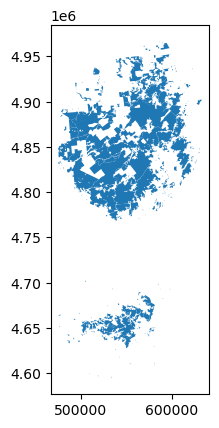

In [8]:
wild_lands.plot()

In [9]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((487253.577 4641356.293, 486541.193 4...
Name: geometry, dtype: geometry